### Import all Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
from preprocessing import  pre_df
from dateutil.relativedelta import relativedelta
import seaborn as sns
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# order_df=pd.read_parquet('tezcatli_orders_data.parquet')
# dodge_df=pd.read_excel('Housing Starts Analytics.xlsx')
# rr_data=pd.read_csv('r&r.csv')

			

              Region Name Forecast Group  MAPE  Random state  n_estimator  \
0  Texas and South Plains      C+ Dr Plk 43.19            22            1   

   Seq Size  Lag 3 MAPE  
0        21       -5.30  
[22, 1, 21]


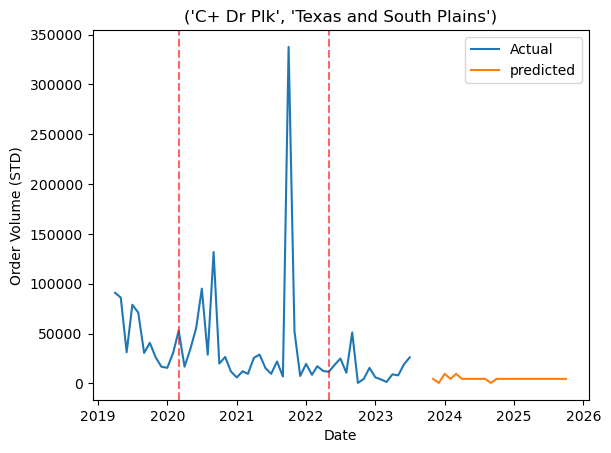

  Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0   Carolinas      C+ Dr Plk 33.60            49            3        19   

   Lag 3 MAPE  
0        1.42  
[49, 3, 19]


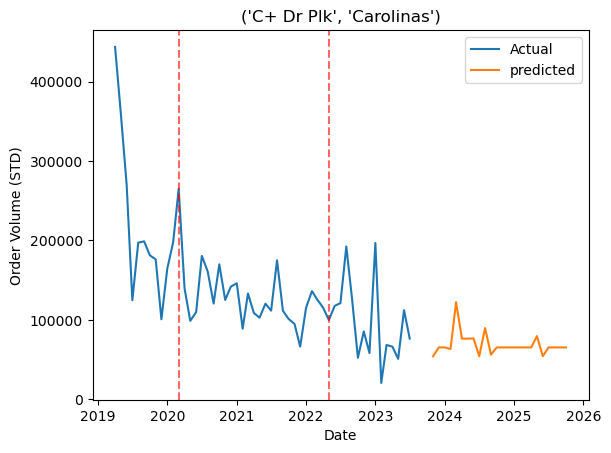

    Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0  Midwest East      C+ Dr Plk 15.03            66            4        39   

   Lag 3 MAPE  
0       -9.29  
[66, 4, 39]


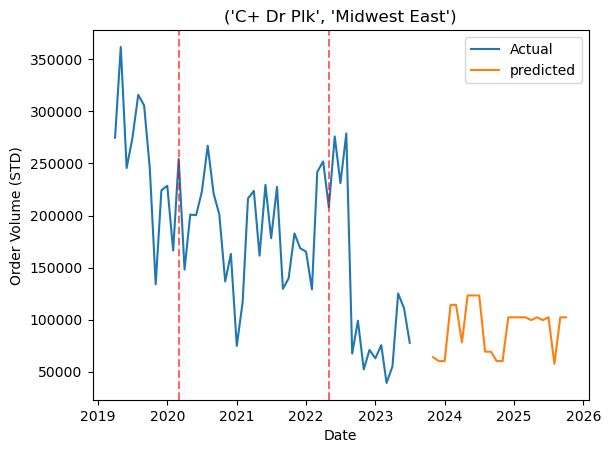

      Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0  North Atlantic      C+ Dr Plk 11.98            75            1        32   

   Lag 3 MAPE  
0       -8.13  
[75, 1, 32]


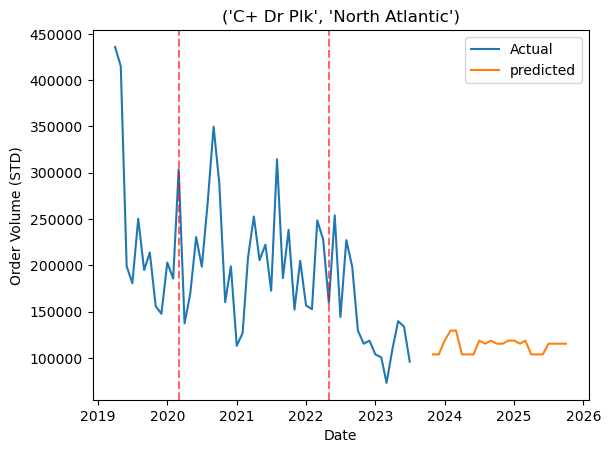

  Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0   Mid South      C+ Dr Plk 37.69            86            1        38   

   Lag 3 MAPE  
0        3.73  
[86, 1, 38]


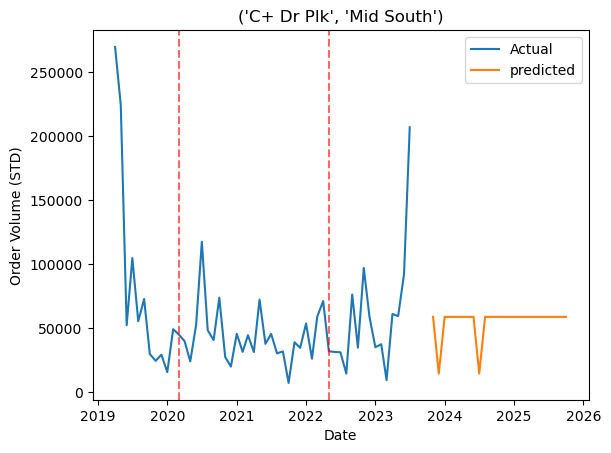

  Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0   Southeast      C+ Dr Plk 23.36            34            1        28   

   Lag 3 MAPE  
0       10.00  
[34, 1, 28]


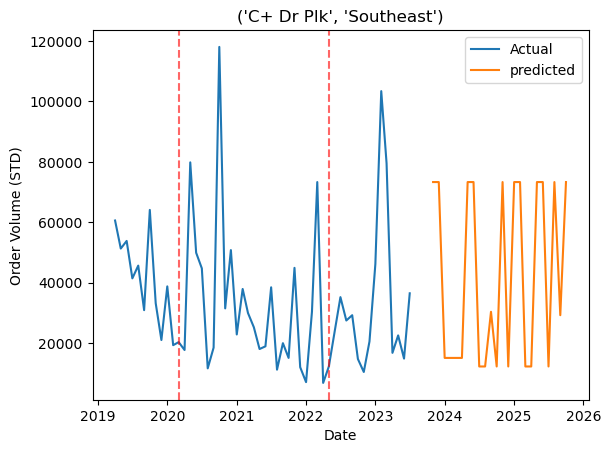

       Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0  Midwest Central      C+ Dr Plk 15.31            32            2        37   

   Lag 3 MAPE  
0      -12.33  
[32, 2, 37]


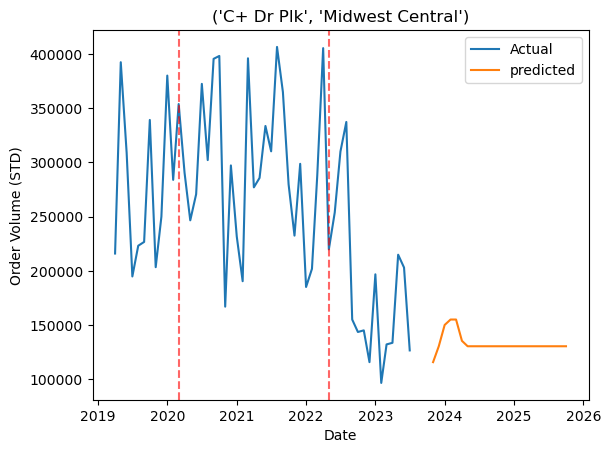

    Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0  Midwest West      C+ Dr Plk 19.68            31            5        38   

   Lag 3 MAPE  
0       -6.25  
[31, 5, 38]


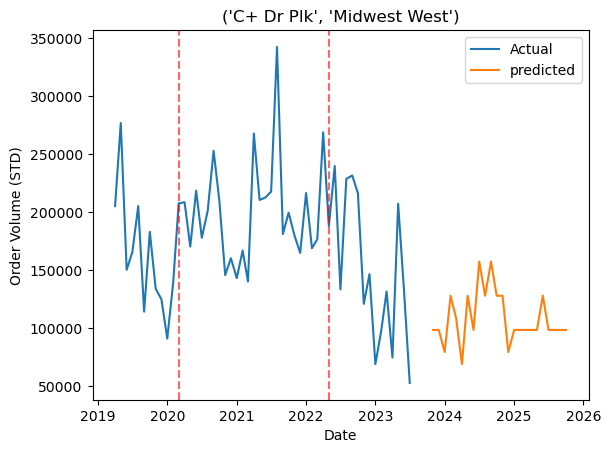

    Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0  Mid Atlantic      C+ Dr Plk  6.35             6            3        23   

   Lag 3 MAPE  
0       -1.04  
[6, 3, 23]


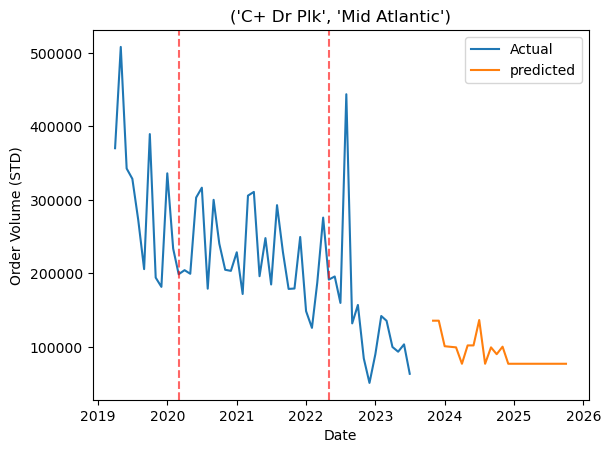

  Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0   Southwest      C+ Dr Plk 37.89            54            1        28   

   Lag 3 MAPE  
0      -38.61  
[54, 1, 28]


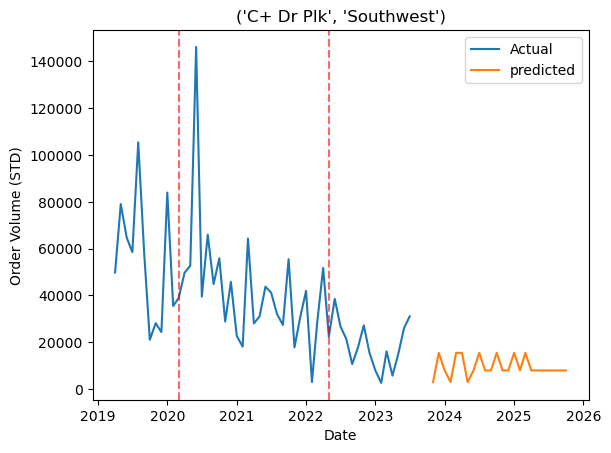

  Region Name Forecast Group  MAPE  Random state  n_estimator  Seq Size  \
0    Mountain      C+ Dr Plk 14.08            58            1        27   

   Lag 3 MAPE  
0       14.19  
[58, 1, 27]


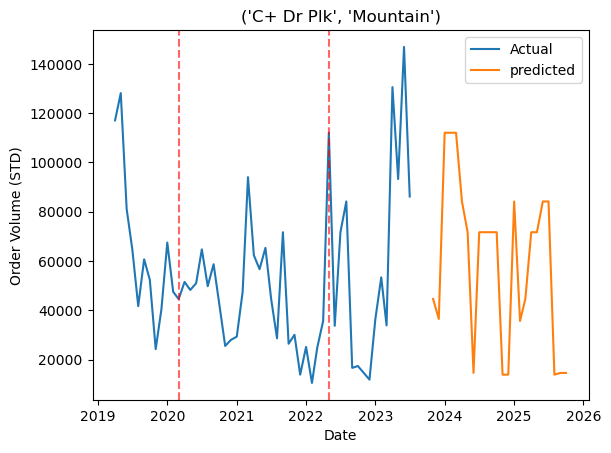

         Region Name Forecast Group  MAPE  Random state  n_estimator  \
0  Pacific Northwest      C+ Dr Plk 49.27            35            2   

   Seq Size  Lag 3 MAPE  
0         4       13.25  
[35, 2, 4]


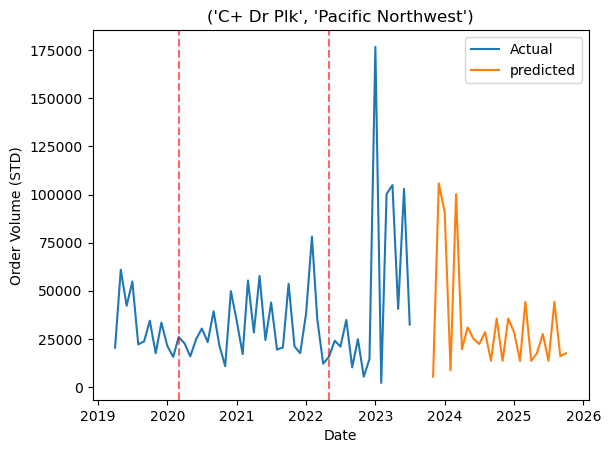

              Region Name Forecast Group  MAPE  Random state  n_estimator  \
0  Texas and South Plains  C+ St Soff 8' 20.59            96           10   

   Seq Size  Lag 3 MAPE  
0        71        9.85  
[96, 10, 71]


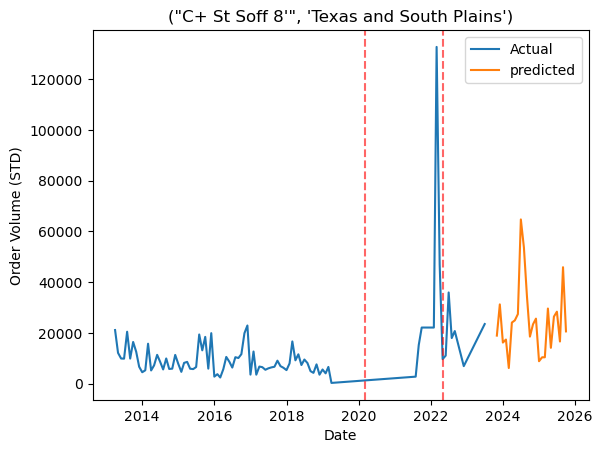

In [28]:
region=['Texas and South Plains','Carolinas','Midwest East','North Atlantic','Mid South','Southeast','Midwest Central','Midwest West','Mid Atlantic','Southwest','Mountain','Pacific Northwest']
forecast_group=["C+ Dr Plk","C+ St Soff 8'","C+ Dr Pnl","Pr Batt","C+ St VL"]	
br=True     
# print('start 1')
final_df=pd.DataFrame()
for fore_gp in forecast_group:
    for re in region:
        df=pre_df(fore_gp,re)
        if len(df) <= 10:
            print("Insufficient data ",fore_gp,re,len(df))
            continue
        mape_min=[]
        params_list=[]
        try:
          if len(df) <= 60: 

            for z in range(4,len(df)-7):
                if br==False:
                    break
                for j in range(1,15):
                    if br==False:
                        break
                    for r in range(1,99):

                        seq_size=z
                        n_estimator=j
                        ran_state=r
                        x = []  # List to store the input sequences (windows)
                        y = []  # List to store the output values (targets)
                        # print('start 2')
                        for i in range(len(df) - seq_size ):
                            # Extract the current window (input sequence) from the DataFrame
                            w=df.iloc[i:(i + seq_size), :]
                            # print(w)
                            x.append(list(np.array(w).ravel()))
                            t=df.iloc[(i + seq_size), :]
                            # print(t)
                            y.append(list(np.array(t).ravel()))
                            
                        lm=6
                        model=RandomForestRegressor(n_estimators=n_estimator,random_state=ran_state)
                        x=np.array(x) # converting in numpy array
                        y=np.array(y)
                        # Splitting traing and testing data
                    
                        x_train=x[:-lm,:]
                        y_train=y[:-lm,:] 
                        x_test=x[-lm:,:]
                        y_test=y[-lm:,:]
                        # print(x_train)
                        model.fit(x_train,y_train) # fitting the model.
                        # model predictions
                        y_p=model.predict(x_test)
                        mape=mean_absolute_percentage_error(y_test[:,2],y_p[:,2])*100
                
                        if (y_p[:,2].std() >=y_test[:,2].std()/10) & (((y_test[:,2][2]-y_p[:,2][2])/y_test[:,2][2])*100 < 19):
                            mape_min.append(mape)
                            params_list.append([r,j,z])
                            
          else:
              for z in range(3,80):
                if br==False:
                    break
                for j in range(1,15):
                    if br==False:
                        break
                    for r in range(1,99):

                        seq_size=z
                        n_estimator=j
                        ran_state=r
                        x = []  # List to store the input sequences (windows)
                        y = []  # List to store the output values (targets)
                        # print('start 2')
                        for i in range(len(df) - seq_size ):
                            # Extract the current window (input sequence) from the DataFrame
                            w=df.iloc[i:(i + seq_size), :]
                            # print(w)
                            x.append(list(np.array(w).ravel()))
                            t=df.iloc[(i + seq_size), :]
                            # print(t)
                            y.append(list(np.array(t).ravel()))
                            
                        lm=6
                        model=RandomForestRegressor(n_estimators=n_estimator,random_state=ran_state)
                        x=np.array(x) # converting in numpy array
                        y=np.array(y)
                        # Splitting traing and testing data
                    
                        x_train=x[:-lm,:]
                        y_train=y[:-lm,:] 
                        x_test=x[-lm:,:]
                        y_test=y[-lm:,:]
                        # print(x_train)
                        model.fit(x_train,y_train) # fitting the model.
                        # model predictions
                        y_p=model.predict(x_test)
                        mape=mean_absolute_percentage_error(y_test[:,2],y_p[:,2])*100
                
                        
                        mape_min.append(mape)
                        params_list.append([r,j,z])
              
                          # print('start 3')
                      
                        
        finally:
          # print('start 4')
          if len(mape_min) < 1:
              print("Inconsistent Data :",fore_gp,re,len(df))
              continue

          id_min=mape_min.index(min(mape_min))
          ran_state=params_list[id_min][0]
          n_estimator=params_list[id_min][1]
          seq_size=params_list[id_min][2]
          x = []  # List to store the input sequences (windows)
          y = []  # List to store the output values (targets)

          for i in range(len(df) - seq_size ):
              # Extract the current window (input sequence) from the DataFrame
              w=df.iloc[i:(i + seq_size), :]
              # print(w)
              x.append(list(np.array(w).ravel()))
              t=df.iloc[(i + seq_size), :]
              # print(t)
              y.append(list(np.array(t).ravel()))
              
          lm=6

          model=RandomForestRegressor(n_estimators=n_estimator,random_state=ran_state)
          x=np.array(x) # converting in numpy array
          y=np.array(y)
          # Splitting traing and testing data
      
          x_train=x[:-lm,:]
          y_train=y[:-lm,:] 
          x_test=x[-lm:,:]
          y_test=y[-lm:,:]
          # print(x_train)
          model.fit(x_train,y_train) # fitting the model.
          # model predictions
          y_p=model.predict(x_test)
          compare_df=pd.DataFrame()
          compare_df.index=pd.date_range(start=df.index[-1] - relativedelta(months=5) + relativedelta(months=9),end=df.index[-1] + relativedelta(months=9),freq='MS')
        
          compare_df['Forecast_values']=y_p[:,2]
          mape=mean_absolute_percentage_error(y_test[:,2],y_p[:,2])*100
          # Empty list for storing the values
          forecast=[]
          x_test=x_test[-1,:]
          pd.options.display.float_format = '{:.2f}'.format
          # print('start 5')
          for i in range(19):
              temp=model.predict([x_test])[0]
              forecast.append(model.predict([x_test])[0][2])
              x_test=x_test[3:]
              x_test=np.append(x_test,temp)
          s=df.index[-1] + relativedelta(months=1)
          date_range=pd.date_range(start=s.date()  + relativedelta(months=9),end=s.date() +relativedelta(months=17)+relativedelta(months=9),freq='MS')
          # print('start 6')
          param_df={}
          param_df['Region Name']=re						
          param_df['Forecast Group']=fore_gp
          param_df['MAPE']=mape
          param_df['Random state']=ran_state
          param_df['n_estimator']=n_estimator
          param_df['Seq Size']=seq_size
          param_df['Lag 3 MAPE']=((y_test[:,2][2]-y_p[:,2][2])/y_test[:,2][2])*100
      
          param_df= pd.DataFrame([param_df])
          print(param_df)
          print([ran_state,n_estimator,seq_size])
          forecast_df=pd.DataFrame()
          forecast_df.index=date_range
          forecast_df['Forecast_values']=forecast[1:]
          forecast_df=pd.concat([compare_df,forecast_df],axis=0)
          forecast_df=pd.concat([forecast_df,param_df],axis=0).fillna(method='bfill').dropna()
          final_df=pd.concat([final_df,forecast_df])
          
          plt.plot(df.index,df['Order Volume (STD)'],label='Actual')
          plt.plot(forecast_df.index,forecast_df['Forecast_values'],label='predicted')
          plt.title(f'{fore_gp,re}')
          plt.xlabel('Date')
          plt.ylabel('Order Volume (STD)')
          plt.axvline(x=['2020-03-01'],color='red', alpha = 0.6,linestyle='dashed')
          plt.axvline(x=['2022-05-01'],color='red', alpha = 0.6,linestyle='dashed')
          plt.legend()
          plt.show()
final_df.to_csv(f'final_df1.csv')

# MODEL

In [19]:
# compare_df=pd.DataFrame()
# compare_df.index=pd.date_range(start=df.index[-1] - relativedelta(months=5),end=df.index[-1],freq='MS')
# compare_df['Forecast_values']=y_p[:,2]
seq_size

44

In [26]:
final_df.to_csv(f'final_df1.csv')